***
## Table of Contents
<br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. HTTP</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a></h2>
        <ul><a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#2.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

<br>
    <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. HTTPS</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#3.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#3.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a></h2>
        <ul><a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#4.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=3,verbose=True)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    display(cm_train)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    display(cm_test)
    fpr, tpr, threshold = roc_curve(y_test, grid_search.predict(x_test))
    roc_auc =auc(fpr, tpr)
    return grid_search,cm_train,cm_test,acc_train,acc_test,roc_auc  

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

## <a id='1' style="text-decoration : none; color : #000000;"> HTTP</a>

### <a id='1.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [3]:
df_alex=pd.read_csv('Javascript_alexa_output_final_http.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_http.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)

display(df.shape)

# df.to_csv('Javascript_dom.csv')

df.head()

(43296, 407)

,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

In [4]:
df.Malicious.value_counts()

0    37009
1     6287
Name: Malicious, dtype: int64

In [5]:
js_cols=([col for col in df.columns if (('js' in col) or ('number' in col))])

dom_cols=([col for col in df.columns if 'dom' in col])

X=df.loc[:,df.columns!='Malicious']
X.drop(['number_of_unsecure_cookies','number_of_secure_cookies','number_of_non_http_only_cookies','number_of_http_only_cookies',
 'number_of_cookies','number_functions_declared'],axis=1,inplace=True)
y=df.Malicious.values
feature_name = X.columns.tolist()

### <a id='1.B' style="text-decoration : none; color : #000000;">B. Feature Selection</a>

<ol>
    <ul><h4> 1. Correlation</h4></ul>
    <ul><h4> 2. Chi2 </h4></ul>
    <ul><h4> 3. Recursive Feature Elimination </h4></ul>
    <ul><h4> 4. Select From Model </h4></ul>
</ol>

In [6]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()


feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [7]:
X=df[feature_selection_df[feature_selection_df.Total==4]['Feature']]
y=df.Malicious.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(43296, 72)

#### C.1 List of features selected

In [8]:
feature_name

['js_function_parseInt(',
 'js_function_isFinite(',
 'js_function_escape(',
 'js_function_encodeURIComponent(',
 'js_function_decodeURIComponent(',
 'js_function_String.fromCharCode(',
 'js_function_Object.keys(',
 'js_function_Object.getOwnPropertyNames(',
 'js_function_Math.round(',
 'js_function_Math.random(',
 'js_function_Math.min(',
 'js_function_Math.max(',
 'js_function_Math.floor(',
 'js_function_JSON.stringify(',
 'js_function_JSON.parse(',
 'js_function_Date.now(',
 'js_function_.trim(',
 'js_function_.toString(',
 'js_function_.toLowerCase(',
 'js_function_.test(',
 'js_function_.substring(',
 'js_function_.substr',
 'js_function_.split(',
 'js_function_.sort(',
 'js_function_.shift(',
 'js_function_.setTime(',
 'js_function_.setHours(',
 'js_function_.reverse(',
 'js_function_.replace(',
 'js_function_.push(',
 'js_function_.pop(',
 'js_function_.min(',
 'js_function_.match(',
 'js_function_.map(',
 'js_function_.keys(',
 'js_function_.join(',
 'js_function_.indexOf(',
 'j

### <a id='1.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [9]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [10]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8595680794549024


Predicted  False  True  __all__
Actual                         
False      29613    28    29641
True        4836   159     4995
__all__    34449   187    34636

The accuracy of the model on test data is: 0.8530023094688222


Predicted  False  True  __all__
Actual                         
False       7355    13     7368
True        1260    32     1292
__all__     8615    45     8660

#### D.2. KNN

In [11]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.837798822034877


Predicted  False   True  __all__
Actual                          
False      24328   5313    29641
True         305   4690     4995
__all__    24633  10003    34636

The accuracy of the model on test data is: 0.8382217090069284


Predicted  False  True  __all__
Actual                         
False       6064  1304     7368
True          97  1195     1292
__all__     6161  2499     8660

#### D.3. Logistics

In [12]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8556126573507333


Predicted  False  True  __all__
Actual                         
False      29618    23    29641
True        4978    17     4995
__all__    34596    40    34636

The accuracy of the model on test data is: 0.85


Predicted  False  True  __all__
Actual                         
False       7359     9     7368
True        1290     2     1292
__all__     8649    11     8660

#### D.4. Random Forest Classifier

In [13]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8640143203603188


Predicted  False  True  __all__
Actual                         
False      29580    61    29641
True        4649   346     4995
__all__    34229   407    34636

The accuracy of the model on test data is: 0.856581986143187


Predicted  False  True  __all__
Actual                         
False       7346    22     7368
True        1220    72     1292
__all__     8566    94     8660

#### D.5. AdaBoost Classifier

In [14]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8526388728490588


Predicted  False  True  __all__
Actual                         
False      29513   128    29641
True        4976    19     4995
__all__    34489   147    34636

The accuracy of the model on test data is: 0.8480369515011548


Predicted  False  True  __all__
Actual                         
False       7339    29     7368
True        1287     5     1292
__all__     8626    34     8660

#### D.6. GradientBoosting Classifier

In [15]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8578935211918235


Predicted  False  True  __all__
Actual                         
False      29616    25    29641
True        4897    98     4995
__all__    34513   123    34636

The accuracy of the model on test data is: 0.8521939953810623


Predicted  False  True  __all__
Actual                         
False       7357    11     7368
True        1269    23     1292
__all__     8626    34     8660

#### D.7. Extra Tree Classifier

In [16]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8648515994918582


Predicted  False  True  __all__
Actual                         
False      29591    50    29641
True        4631   364     4995
__all__    34222   414    34636

The accuracy of the model on test data is: 0.856581986143187


Predicted  False  True  __all__
Actual                         
False       7344    24     7368
True        1218    74     1292
__all__     8562    98     8660

#### D.8. Bagging Classifier

In [17]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8641009354428918


Predicted  False  True  __all__
Actual                         
False      29587    54    29641
True        4653   342     4995
__all__    34240   396    34636

The accuracy of the model on test data is: 0.8557736720554272


Predicted  False  True  __all__
Actual                         
False       7340    28     7368
True        1221    71     1292
__all__     8561    99     8660

#### D.9. Voting Classifier

In [18]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8617911999076106


Predicted  False  True  __all__
Actual                         
False      29613    28    29641
True        4759   236     4995
__all__    34372   264    34636

The accuracy of the model on test data is: 0.856581986143187


Predicted  False  True  __all__
Actual                         
False       7361     7     7368
True        1235    57     1292
__all__     8596    64     8660

### <a id='1.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [19]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.859568,159.0,29613.0,28.0,4836.0,0.000945,0.968168
KNeighborsClassifier,0.837799,4690.0,24328.0,5313.0,305.0,0.179245,0.061061
LogisticRegression,0.855613,17.0,29618.0,23.0,4978.0,0.000776,0.996597
RandomForestClassifier,0.864014,346.0,29580.0,61.0,4649.0,0.002058,0.930731
AdaBoostClassifier,0.852639,19.0,29513.0,128.0,4976.0,0.004318,0.996196
GradientBoostingClassifier,0.857894,98.0,29616.0,25.0,4897.0,0.000843,0.980380
ExtraTreeClassifier,0.864852,364.0,29591.0,50.0,4631.0,0.001687,0.927127
BaggingClassifier,0.864101,342.0,29587.0,54.0,4653.0,0.001822,0.931532
VotingClassifier,0.861791,236.0,29613.0,28.0,4759.0,0.000945,0.952753


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.853002,32.0,7355.0,13.0,1260.0,0.001764,0.975232,0.511502
KNeighborsClassifier,0.838222,1195.0,6064.0,1304.0,97.0,0.176982,0.075077,0.873971
LogisticRegression,0.850000,2.0,7359.0,9.0,1290.0,0.001221,0.998452,0.500163
RandomForestClassifier,0.856582,72.0,7346.0,22.0,1220.0,0.002986,0.944272,0.526371
AdaBoostClassifier,0.848037,5.0,7339.0,29.0,1287.0,0.003936,0.996130,0.499967
GradientBoostingClassifier,0.852194,23.0,7357.0,11.0,1269.0,0.001493,0.982198,0.508154
ExtraTreeClassifier,0.856582,74.0,7344.0,24.0,1218.0,0.003257,0.942724,0.527009
BaggingClassifier,0.855774,71.0,7340.0,28.0,1221.0,0.003800,0.945046,0.525577
VotingClassifier,0.856582,57.0,7361.0,7.0,1235.0,0.000950,0.955882,0.521584


## <a id='2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a>

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [20]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [21]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
pca=PCA(n_components=48,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,random_state=0,test_size=0.2)

X_train.shape

0.9227065700077672
The train/test split ratio is 80:20


(34636, 48)

#### A.1. Deep Learning

In [22]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=48))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8599145397851946


Predicted  False  True  __all__
Actual                         
False      29612    29    29641
True        4823   172     4995
__all__    34435   201    34636

The accuracy of the model on test data is: 0.8546189376443418


Predicted  False  True  __all__
Actual                         
False       7359     9     7368
True        1250    42     1292
__all__     8609    51     8660

#### A.2. KNN

In [23]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8603476151980598


Predicted  False  True  __all__
Actual                         
False      29575    66    29641
True        4771   224     4995
__all__    34346   290    34636

The accuracy of the model on test data is: 0.855311778290993


Predicted  False  True  __all__
Actual                         
False       7351    17     7368
True        1236    56     1292
__all__     8587    73     8660

#### A.3. Logistics

In [24]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8556704007391154


Predicted  False  True  __all__
Actual                         
False      29619    22    29641
True        4977    18     4995
__all__    34596    40    34636

The accuracy of the model on test data is: 0.8504618937644342


Predicted  False  True  __all__
Actual                         
False       7363     5     7368
True        1290     2     1292
__all__     8653     7     8660

#### A.4. Random Forest Classifier

In [25]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8639565769719367


Predicted  False  True  __all__
Actual                         
False      29580    61    29641
True        4651   344     4995
__all__    34231   405    34636

The accuracy of the model on test data is: 0.8569284064665127


Predicted  False  True  __all__
Actual                         
False       7349    19     7368
True        1220    72     1292
__all__     8569    91     8660

#### A.5. AdaBoost Classifier

In [26]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8576914193324864


Predicted  False  True  __all__
Actual                         
False      29617    24    29641
True        4905    90     4995
__all__    34522   114    34636

The accuracy of the model on test data is: 0.852540415704388


Predicted  False  True  __all__
Actual                         
False       7362     6     7368
True        1271    21     1292
__all__     8633    27     8660

#### A.6. GradientBoosting Classifier

In [27]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8615890980482734


Predicted  False  True  __all__
Actual                         
False      29613    28    29641
True        4766   229     4995
__all__    34379   257    34636

The accuracy of the model on test data is: 0.8561200923787529


Predicted  False  True  __all__
Actual                         
False       7356    12     7368
True        1234    58     1292
__all__     8590    70     8660

#### A.7. Extra Tree Classifier

In [28]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8648515994918582


Predicted  False  True  __all__
Actual                         
False      29591    50    29641
True        4631   364     4995
__all__    34222   414    34636

The accuracy of the model on test data is: 0.8560046189376443


Predicted  False  True  __all__
Actual                         
False       7339    29     7368
True        1218    74     1292
__all__     8557   103     8660

#### A.8. Bagging Classifier

In [29]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8639565769719367


Predicted  False  True  __all__
Actual                         
False      29587    54    29641
True        4658   337     4995
__all__    34245   391    34636

The accuracy of the model on test data is: 0.8560046189376443


Predicted  False  True  __all__
Actual                         
False       7345    23     7368
True        1224    68     1292
__all__     8569    91     8660

#### A.9. Voting Classifier

In [30]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8622242753204759


Predicted  False  True  __all__
Actual                         
False      29613    28    29641
True        4744   251     4995
__all__    34357   279    34636

The accuracy of the model on test data is: 0.8568129330254042


Predicted  False  True  __all__
Actual                         
False       7360     8     7368
True        1232    60     1292
__all__     8592    68     8660

### <a id='2.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [31]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.859915,172.0,29612.0,29.0,4823.0,0.000978,0.965566
KNeighborsClassifier,0.860348,224.0,29575.0,66.0,4771.0,0.002227,0.955155
LogisticRegression,0.855670,18.0,29619.0,22.0,4977.0,0.000742,0.996396
RandomForestClassifier,0.863957,344.0,29580.0,61.0,4651.0,0.002058,0.931131
AdaBoostClassifier,0.857691,90.0,29617.0,24.0,4905.0,0.000810,0.981982
GradientBoostingClassifier,0.861589,229.0,29613.0,28.0,4766.0,0.000945,0.954154
ExtraTreeClassifier,0.864852,364.0,29591.0,50.0,4631.0,0.001687,0.927127
BaggingClassifier,0.863957,337.0,29587.0,54.0,4658.0,0.001822,0.932533
VotingClassifier,0.862224,251.0,29613.0,28.0,4744.0,0.000945,0.949750


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.854619,42.0,7359.0,9.0,1250.0,0.001221,0.967492,0.515643
KNeighborsClassifier,0.855312,56.0,7351.0,17.0,1236.0,0.002307,0.956656,0.520518
LogisticRegression,0.850462,2.0,7363.0,5.0,1290.0,0.000679,0.998452,0.500435
RandomForestClassifier,0.856928,72.0,7349.0,19.0,1220.0,0.002579,0.944272,0.526574
AdaBoostClassifier,0.852540,21.0,7362.0,6.0,1271.0,0.000814,0.983746,0.507720
GradientBoostingClassifier,0.856120,58.0,7356.0,12.0,1234.0,0.001629,0.955108,0.521631
ExtraTreeClassifier,0.856005,74.0,7339.0,29.0,1218.0,0.003936,0.942724,0.526670
BaggingClassifier,0.856005,68.0,7345.0,23.0,1224.0,0.003122,0.947368,0.524755
VotingClassifier,0.856813,60.0,7360.0,8.0,1232.0,0.001086,0.953560,0.522677


### <a id='2.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [32]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
58,0.020591,dom_function_window.setInterval(
67,0.020568,dom_function_document.getElementsByClassName(
65,0.020511,dom_function_document.open(
64,0.020412,dom_function_document.querySelector(
29,0.020409,js_function_.push(
59,0.020358,dom_function_window.matchMedia(
68,0.020270,dom_function_document.getElementById(
62,0.020230,dom_function_window.addEventListener(
17,0.020195,js_function_.toString(
63,0.020157,dom_function_document.querySelectorAll(


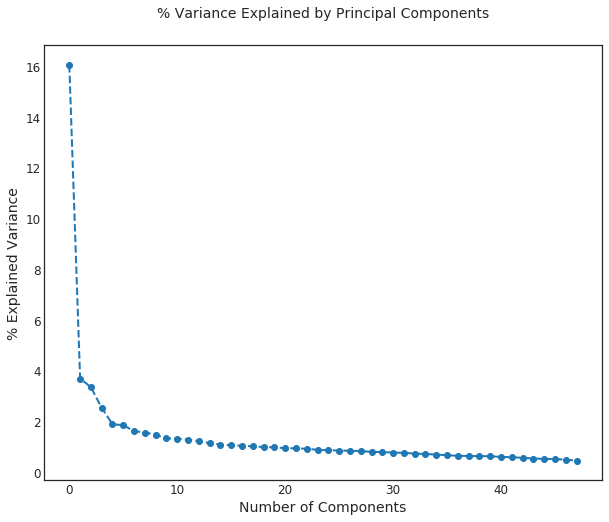

In [33]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


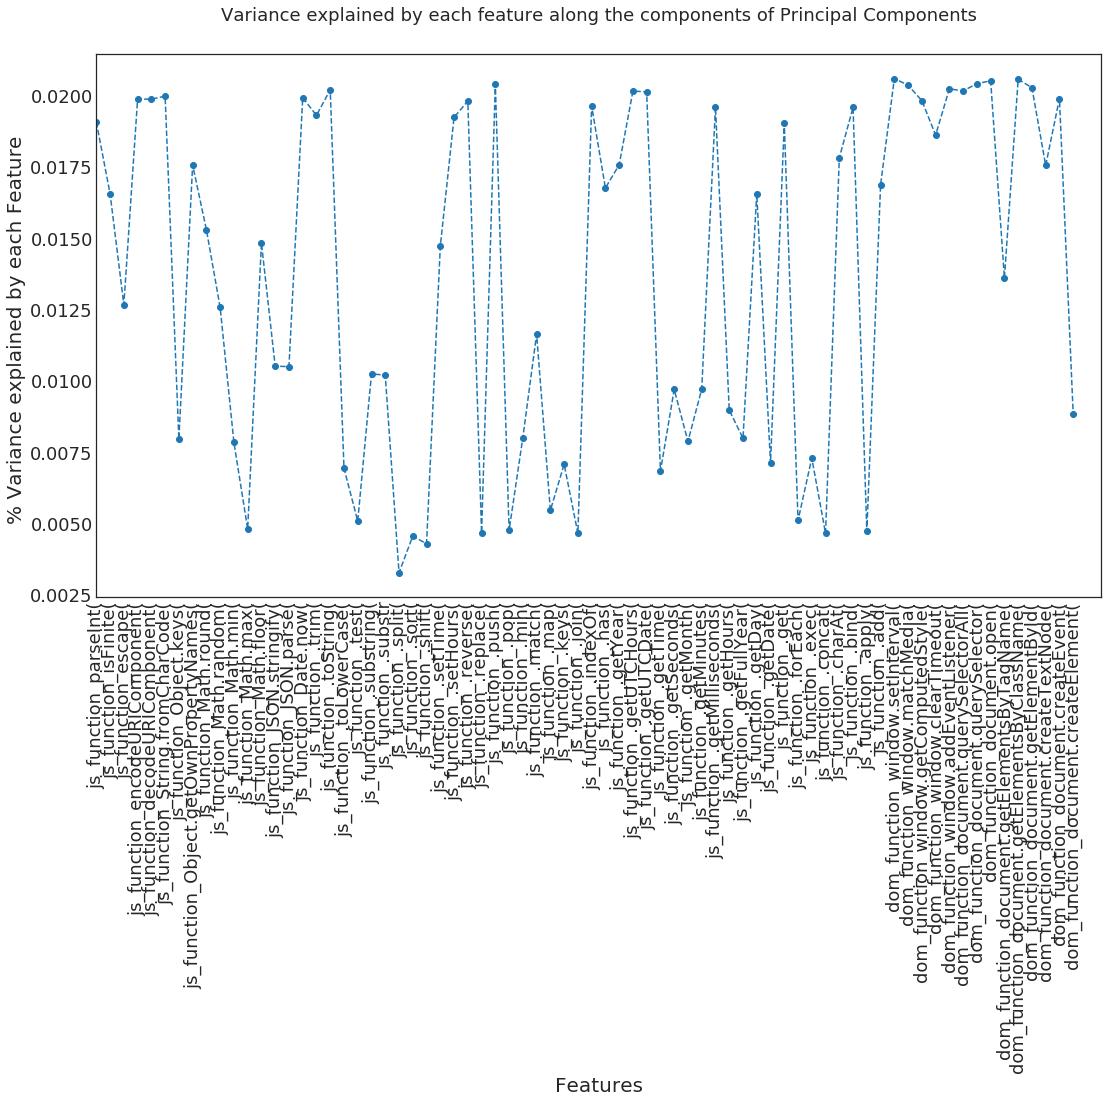

In [34]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 73])
plt.xticks(np.arange(73),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

In [65]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')